<a href="https://colab.research.google.com/github/Naveesha1309/Sentiment-Analysis-of-Amazon-Product-Reviews/blob/master/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# changes made

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
import nltk
from nltk.corpus import stopwords
from string import punctuation

In [ ]:
from google.colab import files

uploaded = files.upload()

# Read the uploaded file
dataset = pd.read_csv("amazon_reviews.csv")

# Getting "reviewText" column
reviewText = dataset['reviewText']


Saving amazon_reviews.csv to amazon_reviews.csv


In [ ]:
dataset.columns

Index(['Unnamed: 0', 'reviewerName', 'overall', 'reviewText', 'reviewTime',
       'day_diff', 'helpful_yes', 'helpful_no', 'total_vote',
       'score_pos_neg_diff', 'score_average_rating', 'wilson_lower_bound'],
      dtype='object')

In [ ]:
dataset.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   float64
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 460.9+ KB


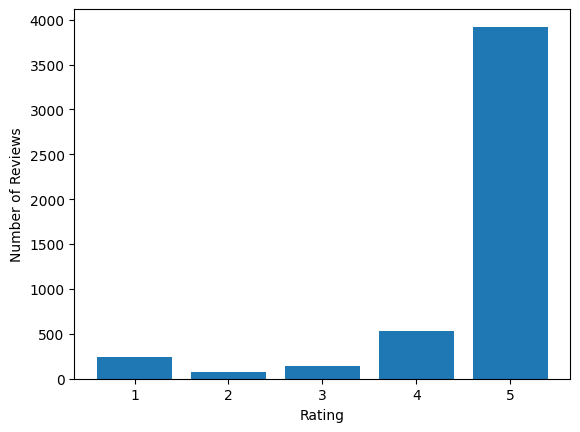

In [ ]:
# Grouping based on rating and calculate count of reviews for each unique rating.
# This returns a Pandas series object with the ratings as the index(x axis) and the corresponding count of reviews as the values(y axis).
ratings_count = dataset.groupby('overall')['reviewText'].count()
plt.bar(ratings_count.index, ratings_count.values)
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()


In [ ]:
reviewText.head()

0                                           No issues.
1    Purchased this for my device, it worked as adv...
2    it works as expected. I should have sprung for...
3    This think has worked out great.Had a diff. br...
4    Bought it with Retail Packaging, arrived legit...
Name: reviewText, dtype: object

In [ ]:
# removes NULL or NaN values, if present, from reviewText and returns a new object.
# dropna() drops the entire row or element if it contains at least one missing value(default: how=any)
reviewText = reviewText.dropna()

In [ ]:
''' Set punctuations'''

# from string import punctuation (Python's ‘string’ module)
# 'set(punctuation)' creates a set containing unique punctuation characters from the punctuation constant imported from the string module
punctuations = set(punctuation)

# Exceptions on punctuations (because some punctuations may carry important meaning in sentiment analysis)
punctuations.remove('.')
punctuations.remove(',')
punctuations.remove('!')
punctuations.remove('?')

In [ ]:
''' Remove punctuations from the reviews '''

reviewText = reviewText.apply(lambda x: ''.join([word for word in x
                                                  if word not in punctuations]))

dataset['reviewText'] = reviewText

In [ ]:
reviewText.head()

0                                           No issues.
1    Purchased this for my device, it worked as adv...
2    it works as expected. I should have sprung for...
3    This think has worked out great.Had a diff. br...
4    Bought it with Retail Packaging, arrived legit...
Name: reviewText, dtype: object

In [ ]:
from nltk.tokenize import word_tokenize

# Tokenization: dividing a piece of text into smaller units, called tokens.
# word_tokenize: this function takes a string of text as input and returns a list of individual words or tokens

In [ ]:
nltk.download('punkt')
# word_tokenize function relies on the Punkt tokenizer for tokenizing text into words.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
reviewText = reviewText.apply(word_tokenize)

In [ ]:
reviewText.head()

0                                      [No, issues, .]
1    [Purchased, this, for, my, device, ,, it, work...
2    [it, works, as, expected, ., I, should, have, ...
3    [This, think, has, worked, out, great.Had, a, ...
4    [Bought, it, with, Retail, Packaging, ,, arriv...
Name: reviewText, dtype: object

In [ ]:
# Downloading stopwords from nltk library
# It provides a list of common stop words.
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Except "negative words" from the stopwords
for negation in ("not", "no", "nor", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"):
    stop_words.remove(negation)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
''' Remove stop words from the reviews '''

def remove_english_stopwords_func(text):
    # check in lowercase
    t = [token for token in text if token.lower() not in stop_words]
    text = ' '.join(t)
    return text

reviewText=reviewText.apply(remove_english_stopwords_func)

dataset['reviewText'] = reviewText

In [ ]:
reviewText.head()

0                                          No issues .
1    Purchased device , worked advertised . never m...
2    works expected . sprung higher capacity . thin...
3    think worked great.Had diff . bran 64gb card w...
4    Bought Retail Packaging , arrived legit , oran...
Name: reviewText, dtype: object

In [ ]:
dataset.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues .,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased device , worked advertised . never m...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,works expected . sprung higher capacity . thin...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,think worked great.Had diff . bran 64gb card w...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought Retail Packaging , arrived legit , oran...",2013-07-13,513,0,0,0,0,0.0,0.0


In [ ]:
'''Lemmatization'''
# Breaking down words into their lemma, or root form

# import spacy
''' en_core_web_sm is a pre-trained statistical model for the English language provided by spaCy. It contains a pipeline
for various NLP tasks.
The disable parameter is used to disable certain components of the pipeline to speed up processing and reduce
memory usage.
Not used in lemmatization:-
parser: used for syntactic analysis of the text
named entity recognizer (ner): used to identify entities like person names, organizations, and locations in the text.
'''

lem = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Lower the text to avoid the limitations of spacy lemmatization. The presence of unexpected uppercases in a word can disrupt the process of lemmatization.
def spacy_text_lemmatizer(text):
    text = str(text).lower()
    text = lem(text)
    text = " ".join([token.lemma_ for token in text])

    return text

# reviewText= reviewText.apply(spacy_text_lemmatizer)
# dataset['reviewText'] = reviewText

In [ ]:
reviewText.head()

0                                          No issues .
1    Purchased device , worked advertised . never m...
2    works expected . sprung higher capacity . thin...
3    think worked great.Had diff . bran 64gb card w...
4    Bought Retail Packaging , arrived legit , oran...
Name: reviewText, dtype: object

In [ ]:
''' Word Embeddings '''

import tensorflow
import tensorflow_hub as hub

''' Load pretrained Word2Vec from tensorflow_hub '''

word2vecPretrained = hub.load("https://tfhub.dev/google/Wiki-words-250/2")

In [ ]:
def get_word2vec_enc(reviews):
    """ get word2vec value for each word in sentence and join so we use as RNN input """
    encoded_reviews = []
    for review in reviews:
        if type(review) == float or review == "":
            review = " "
        tokens = review.split(" ")
        word2vec_embedding = word2vecPretrained(tokens)
        encoded_reviews.append(word2vec_embedding)
    return encoded_reviews

# reviewText=reviewText.apply(get_word2vec_enc)
# dataset['reviewText']=reviewText
# reviewText.head(1)

0    [((tf.Tensor(-0.025992384, shape=(), dtype=flo...
Name: reviewText, dtype: object

In [ ]:
# embeddings = reviewText[0]
# for embedding in embeddings:
#     print(embedding)


In [ ]:
def get_padded_encoded_reviews(encoded_reviews):
    """ make all the encoded sentences same length (50)"""
    max_length = 50 # max number of words in a sentence
    padded_reviews_encoding = []
    for enc_review in encoded_reviews:
        if len(enc_review) > max_length: # if length is bigger than 50 just truncate
            enc_review = enc_review[:max_length]
        zero_padding_cnt = max_length - enc_review.shape[0]
        pad = np.zeros((1, 250))
        for i in range(zero_padding_cnt):
            enc_review = np.concatenate((pad, enc_review), axis=0)
        padded_reviews_encoding.append(enc_review)
    return padded_reviews_encoding

In [ ]:
def rating_encode(rating):
    """ return one hot encoding for rating value """
    if rating == '5.0':
        return [1,0]
    else: # rating == '1.0'
        return [0,1]

In [ ]:
def getTrainAndTestData(dataset):
    ''' Split the data to train and test'''
    # 70% of the dataset
    train = dataset.sample(frac=0.7, random_state=100)
    # 30% of the dataset
    test = dataset.drop(train.index)
    return train, test

In [ ]:
def preprocess(df):
    """ encode text value to numeric value (except 2.0 3.0 and 4.0 rating) """
    df = df[df['overall'] != 2.0]
    df = df[df['overall'] != 3.0]
    df = df[df['overall'] != 4.0]

    # apply spacy_text_lemmatizer to every review
    df['reviewText'] = df['reviewText'].apply(spacy_text_lemmatizer)
    reviews = df['reviewText'].tolist()

    # apply word2vec encoder to every review
    encoded_reviews = get_word2vec_enc(reviews)
    # apply padding to every encoded review
    padded_encoded_reviews = get_padded_encoded_reviews(encoded_reviews)

    # encoded rating
    rates = df['overall'].tolist()

    # make rates list of string to use it in rating_encode()
    rates = [str(rate) for rate in rates]

    encoded_rating = [rating_encode(rate) for rate in rates]
    X = np.array(padded_encoded_reviews)
    Y = np.array(encoded_rating)

    return X, Y

trainData, testData = getTrainAndTestData(dataset)
train_X, train_Y = preprocess(trainData)

In [ ]:
import tensorflow
from tensorflow.python.keras.layers import Dense, LSTM
from tensorflow.python.keras.engine.sequential import Sequential
from tensorflow.python.keras.callbacks import History

''' Build model using RNN + LSTM '''

model = Sequential()
model.add(LSTM(32))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = History()

# Train

print('Fitting Train Data')
model.fit(train_X, train_Y, epochs=25, callbacks=[history])
model.summary()

# Access the accuracy values at each epoch
accuracy_list =  history.history['accuracy']
print('Accuracy values at each epoch:',accuracy_list)

# Test
print('Evaluating Test Data')
test_X, test_Y = preprocess(testData)
score, acc = model.evaluate(test_X, test_Y, verbose=2)
print('Test score:' , score, "\nTest Accuracy:", acc)


Fitting Train Data
Epoch 1/25
92/92 [==============================] - 10s 59ms/step - loss: 0.2851 - accuracy: 0.9330
Epoch 2/25
92/92 [==============================] - 6s 69ms/step - loss: 0.2137 - accuracy: 0.9395
Epoch 3/25
92/92 [==============================] - 6s 62ms/step - loss: 0.1689 - accuracy: 0.9398
Epoch 4/25
92/92 [==============================] - 6s 62ms/step - loss: 0.1479 - accuracy: 0.9443
Epoch 5/25
92/92 [==============================] - 6s 69ms/step - loss: 0.1509 - accuracy: 0.9443
Epoch 6/25
92/92 [==============================] - 5s 59ms/step - loss: 0.1309 - accuracy: 0.9549
Epoch 7/25
92/92 [==============================] - 8s 85ms/step - loss: 0.1222 - accuracy: 0.9542
Epoch 8/25
92/92 [==============================] - 5s 59ms/step - loss: 0.1141 - accuracy: 0.9593
Epoch 9/25
92/92 [==============================] - 7s 72ms/step - loss: 0.1151 - accuracy: 0.9549
Epoch 10/25
92/92 [==============================] - 5s 59ms/step - loss: 0.1165 - accura

Text(0, 0.5, 'Accuracy')

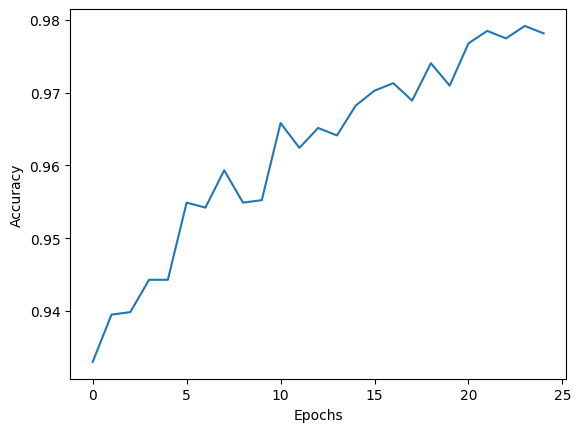

In [ ]:
import matplotlib.pyplot as plt

plt.plot(accuracy_list)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

# Get predicted labels for test data
y_pred = model.predict_classes(test_X)

# Convert one-hot encoded labels to actual labels
y_true = np.argmax(test_Y, axis=1)

# Calculate precision, recall, f1 score, and support
precision, recall, f1_score, support = precision_recall_fscore_support(y_true, y_pred)


print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)
print('Support:', support)


cm = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:\n', cm)


/usr/local/lib/python3.9/dist-packages/tensorflow/python/keras/engine/sequential.py:454: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Precision: [0.97567114 0.79166667]
Recall: [0.99147485 0.56716418]
F1 Score: [0.98350951 0.66086957]
Support: [1173   67]
Confusion Matrix:
 [[1163   10]
 [  29   38]]


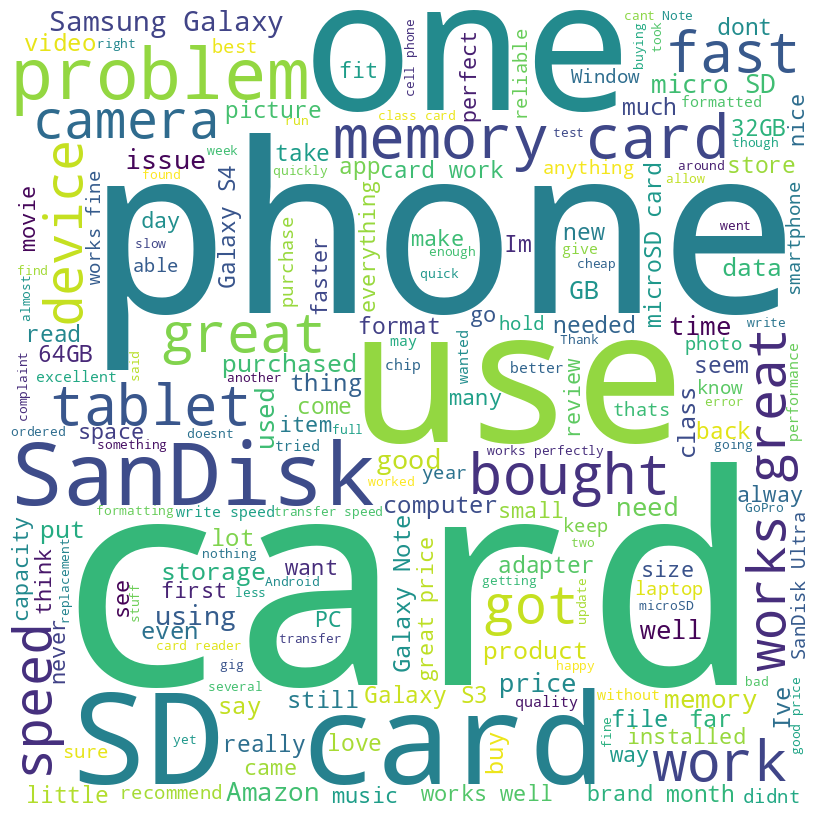

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10)

# Convert the "reviews" column to a string
reviews_text = ' '.join(dataset['reviewText'].astype(str).tolist())


wordcloud.generate(reviews_text)


plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
